In [7]:

import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cupy
from cupyx import scipy
import cupyx.scipy.ndimage as ndimage
import cupyx


import cv2


In [8]:
#check if cuda has initialized
print( cupyx.get_runtime_info() )


gpu = True
if not gpu:
    xp = numpy
else:
    xp = cupy

mydata = xp.empty((3,), dtype='f')    
mydata_like = xp.zeros_like(mydata)

OS                           : Windows-10-10.0.25236-SP0
Python Version               : 3.9.13
CuPy Version                 : 11.2.0
CuPy Platform                : NVIDIA CUDA
NumPy Version                : 1.22.3
SciPy Version                : 1.9.2
Cython Build Version         : 0.29.32
Cython Runtime Version       : 0.29.32
CUDA Root                    : C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.8
nvcc PATH                    : C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.8\bin\nvcc.EXE
CUDA Build Version           : 11070
CUDA Driver Version          : 11080
CUDA Runtime Version         : 11080
cuBLAS Version               : 111103
cuFFT Version                : 10900
cuRAND Version               : 10300
cuSOLVER Version             : (11, 4, 1)
cuSPARSE Version             : 11705
NVRTC Version                : (11, 8)
Thrust Version               : 101500
CUB Build Version            : 101500
Jitify Build Version         : 4a37de0
cuDNN Build Version       

In [9]:
def imshow(img):
    plt.imshow(img)

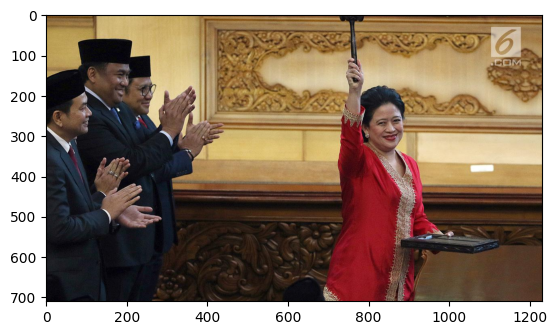

In [10]:
#read file and convert it to numpy array
img = mpimg.imread('anu.jpg')
imshow(img)

cpu time:  0.013961553573608398


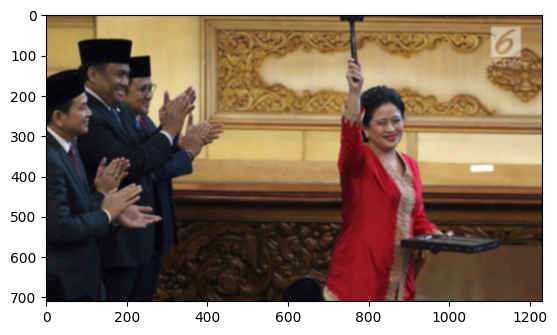

In [12]:

weight_cpu = np.array([[0.005, 0.010, 0.015, 0.020, 0.015, 0.010, 0.005],
                        [0.010, 0.020, 0.025, 0.030, 0.025, 0.020, 0.010],
                        [0.015, 0.025, 0.030, 0.035, 0.030, 0.025, 0.015],
                        [0.020, 0.030, 0.035, 0.040, 0.035, 0.030, 0.020],
                        [0.015, 0.025, 0.030, 0.035, 0.030, 0.025, 0.015],
                        [0.010, 0.020, 0.025, 0.030, 0.025, 0.020, 0.010],
                        [0.005, 0.010, 0.015, 0.020, 0.015, 0.010, 0.005]])
image = cv2.imread('anu.jpg')
start = time.time()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
result = cv2.filter2D(image, -1, weight_cpu)
end = time.time() 
imshow(result)
print("cpu time: ", end - start)




gpu time:  0.0009970664978027344


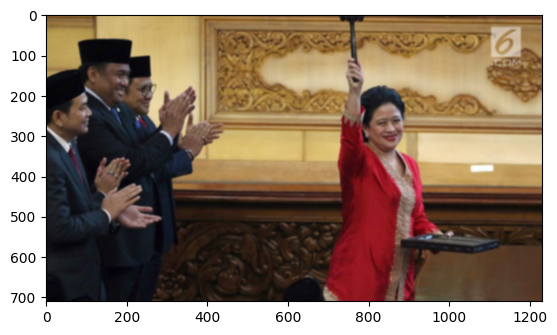

In [13]:
weight_cpu = cupy.array([[0.005, 0.010, 0.015, 0.020, 0.015, 0.010, 0.005],
                        [0.010, 0.020, 0.025, 0.030, 0.025, 0.020, 0.010],
                        [0.015, 0.025, 0.030, 0.035, 0.030, 0.025, 0.015],
                        [0.020, 0.030, 0.035, 0.040, 0.035, 0.030, 0.020],
                        [0.015, 0.025, 0.030, 0.035, 0.030, 0.025, 0.015],
                        [0.010, 0.020, 0.025, 0.030, 0.025, 0.020, 0.010],
                        [0.005, 0.010, 0.015, 0.020, 0.015, 0.010, 0.005]])
weight_cpu = weight_cpu[:,:,np.newaxis]
#cupy read image
image = cupy.array(mpimg.imread('anu.jpg'))
start = time.time()
imgj = ndimage.convolve(image, weight_cpu)
end = time.time()
print("gpu time: ", end - start)
imshow(imgj.get())
